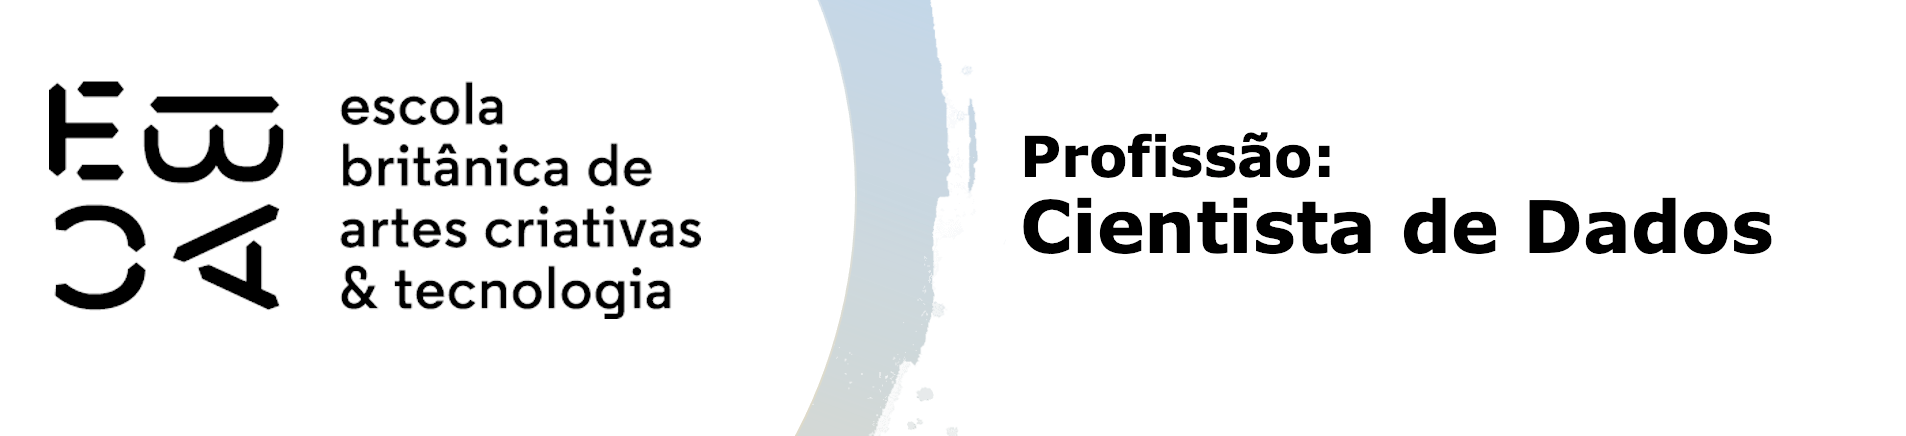

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
### Imports block ###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

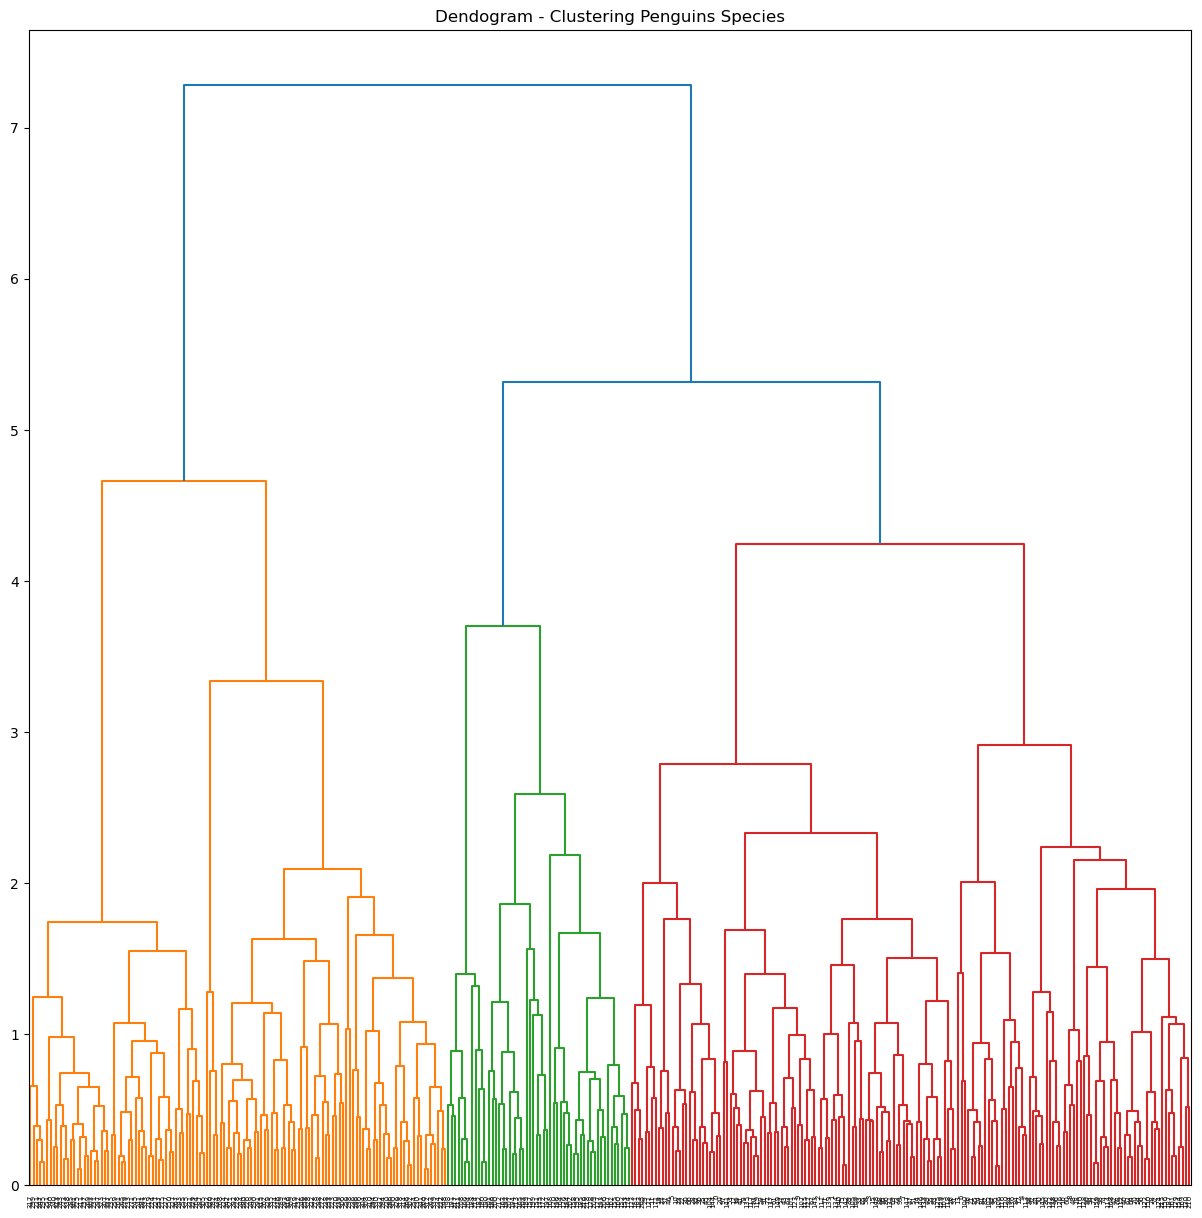

In [8]:
### File opening step ###
data = sns.load_dataset('penguins')

# tasks 1.1 & 1.2
numerical_data = data.select_dtypes(include = 'number').dropna()

# tasks 1.3
padronizador = StandardScaler()
std_data = padronizador.fit_transform(numerical_data)

# tasks 1.4
cluster_3 = AgglomerativeClustering(linkage = 'complete',
                                    distance_threshold = None,
                                    n_clusters = 3)

# tasks 1.5
plt.figure(figsize=(15, 15))
plt.title("Dendogram - Clustering Penguins Species")
dendro_gram = shc.dendrogram(shc.linkage(std_data, method='complete'))
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [12]:
# task 2.1
cluster_labels = cluster_3.fit_predict(std_data)
group_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"Number of individuals in each cluster is:\n{group_counts}")

# task 2.2
numerical_data['cluster'] = cluster_labels
group_stats = numerical_data.groupby('cluster').describe().transpose()
print("\nDescriptive statistics for each cluster:")
group_stats.style.format(precision = 1, decimal = ",")

Number of individuals in each cluster is:
0    123
1    165
2     54
dtype: int64

Descriptive statistics for each cluster:


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [4]:
# task 3.1 -> I chose 5 clusters because of dendrogram
filtered_data = data.dropna()
filtered_num_data = filtered_data.select_dtypes(include = 'number')
filtered_std_data = StandardScaler().fit_transform(filtered_num_data)

# Calculando os rótulos do cluster com os dados filtrados
cluster_5 = AgglomerativeClustering(linkage = 'complete',
                                    distance_threshold = None,
                                    n_clusters = 5)
cluster5_labels = cluster_5.fit_predict(filtered_std_data)

# Task 3.2
group5_counts = pd.Series(cluster5_labels).value_counts().sort_index()
print("Number of individuals in each cluster is:")
group5_counts

Number of individuals in each cluster is:


0    63
1    70
2    97
3    49
4    54
dtype: int64

In [7]:
# Task 3.3
filtered_data = filtered_data.copy()
filtered_data['cluster'] = cluster5_labels
grouped_data = filtered_data.groupby(['cluster', 'species', 'sex']).size().unstack(fill_value = 0)
grouped_data

sex                Female  Male
cluster species                
0       Adelie          0     1
        Chinstrap      28    34
1       Gentoo          9    61
2       Adelie         72    20
        Chinstrap       5     0
3       Gentoo         49     0
4       Adelie          1    52
        Chinstrap       1     0

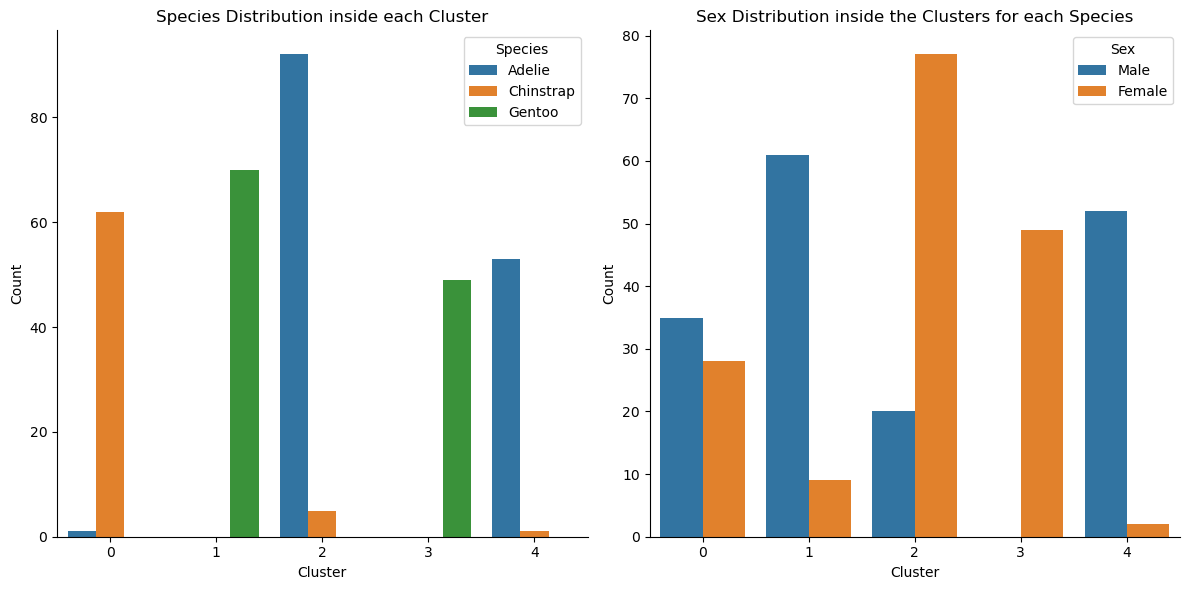

In [6]:
# task 3.4.1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x = 'cluster', hue = 'species', data = filtered_data, ax = axes[0])
axes[0].set_title('Species Distribution inside each Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].legend(title = 'Species')
sns.despine(ax = axes[0])

sns.countplot(x = 'cluster', hue = 'sex', data = filtered_data, hue_order = ['Male', 'Female'], ax = axes[1])
axes[1].set_title('Sex Distribution inside the Clusters for each Species')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].legend(title = 'Sex')
sns.despine(ax = axes[1])

plt.tight_layout()
plt.show()

#### Task 3.4.2:

In my opnion, indeed it does capture a previously hiden pattern that only 3 clusters wouldn't display!

- A simple Association Analysis between the 2 graphs above suggests clustering so that:

> 0: 'Chinstrap'
>
> 1: 'Male Gentoo'
>
> 2: 'Female Adelie'
>
> 3: 'Female Gentoo'
>
> 4: 'Male Adelie'

#### Chinstrap sex distribution is "almost" even (but also shows a little discrepancy), perhaps using 6 clusters it would exhibit the segmentation of data into Male-Famale clusters aswell shown for the other two species.